In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
eigenvalues = pd.read_csv('reduced_model_ETC_core_20240816-155234_tfa_sampling_lambda_max.csv',index_col=0).T

# Read TFA Samples 
tfa_samples = pd.read_csv('reduced_model_ETC_core_20240816-155234_tfa_sampling.csv')

In [2]:
# extract Concentration variables -> LC_
concentration_variables = [x for x in tfa_samples.columns if 'LC_' in x]

# Convert concentration variables from LC to mmol/L
tfa_samples[concentration_variables] = np.exp(tfa_samples[concentration_variables]) * 1e6

# Compute the max, mean, median on the eignevalues

eigenvalues['max'] = np.log10(-1/eigenvalues.iloc[:,:10].max(axis=1))
eigenvalues['mean'] = np.log10(-1/eigenvalues.iloc[:,:10].mean(axis=1) )
eigenvalues['median'] = np.log10(-1/eigenvalues.iloc[:,:10].median(axis=1))

# Align indices
eigenvalues.index = tfa_samples.index


In [3]:
eigenvalues

,0,1,2,3,4,5,6,7,8,9,max,mean,median
0,-0.010545,-0.012471,-0.007054,-0.007805,-0.007898,-0.008805,-0.004966,-0.013316,-0.010779,-0.009446,2.304008,2.031119,2.039744
1,-0.009742,-0.011784,-0.006888,-0.007696,-0.007746,-0.008554,-0.004869,-0.013580,-0.010198,-0.009425,2.312547,2.043442,2.046267
2,-0.009572,-0.010465,-0.006668,-0.007267,-0.007716,-0.007921,-0.004908,-0.012993,-0.009599,-0.008523,2.309079,2.067363,2.085026
3,-0.009920,-0.012191,-0.006612,-0.007330,-0.007422,-0.007967,-0.004598,-0.012778,-0.009654,-0.008887,2.337389,2.058685,2.074320
4,-0.008808,-0.010186,-0.005858,-0.006467,-0.006938,-0.007412,-0.004401,-0.011123,-0.008747,-0.007849,2.356411,2.109088,2.117468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.010095,-0.011400,-0.006220,-0.006899,-0.006803,-0.007464,-0.004278,-0.013414,-0.008528,-0.008422,2.368777,2.078200,2.100029
96,-0.009493,-0.011057,-0.006196,-0.006976,-0.007239,-0.008340,-0.004395,-0.012318,-0.009711,-0.008623,2.357015,2.073926,2.071526
97,-0.009473,-0.011342,-0.006055,-0.006893,-0.006986,-0.008009,-0.004432,-0.012170,-0.009464,-0.008441,2.353371,2.079541,2.084863
98,-0.007163,-0.009968,-0.005315,-0.005973,-0.006137,-0.006796,-0.004107,-0.009569,-0.008054,-0.007308,2.386425,2.152483,2.156176


<Axes: >

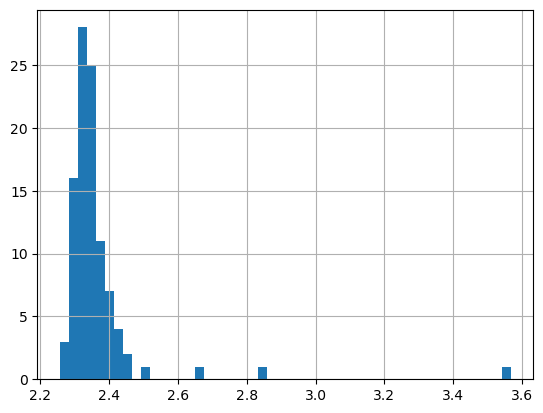

In [4]:
# Hist froma max eigenvalues
plt.figure()
eigenvalues['max'].hist(bins=50)

In [5]:
# Compute correlations between characteristics of the eigencalues and the concentration variables
correlations = pd.DataFrame()
for col in concentration_variables:
    correlations[col] = eigenvalues[['max','mean','median']].corrwith(tfa_samples[col], method='spearman')

correlations = correlations.T
# Drop NA values
correlations = correlations.dropna()

# Make a colum if all correlations are consistent
correlations['consistent'] = correlations.apply(lambda x: all(x > 0) or all(x < 0),axis=1)

# Drop inconsistent correlations

/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [6]:
correlations

,max,mean,median,consistent
LC_o2_c,0.041956,0.007681,0.021974,True
LC_o2_m,0.073623,0.042096,-0.014498,False
LC_h_m,-0.119662,-0.196601,-0.166444,True
LC_h_c,-0.195913,-0.235821,-0.221305,True
LC_atp_c,0.151708,0.159763,0.202157,True
...,...,...,...,...
LC_lac_L_e,-0.183817,-0.271884,-0.254296,True
LC_na1_c,-0.166530,-0.256446,-0.227642,True
LC_fad_m,0.132281,0.256300,0.246517,True
LC_focytC_m,0.056154,0.059022,0.089373,True


<Axes: xlabel='max', ylabel='None'>

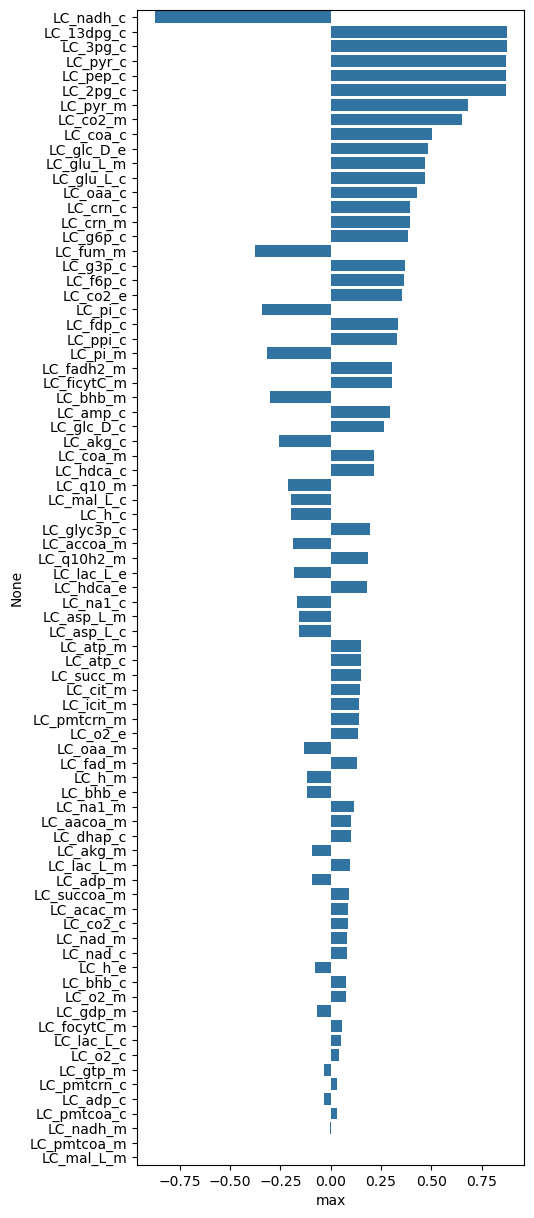

In [7]:
# Rank by absulute value of the max column
correlations['abs_max'] = correlations['max'].abs()

correlations = correlations.sort_values('abs_max',ascending=False)

# Plot the correlations as a bar plot
plt.figure(figsize=(5,15))
sns.barplot(data=correlations,x='max',y=correlations.index)

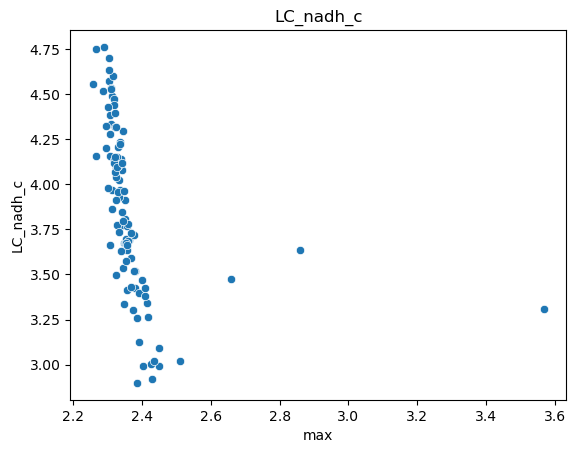

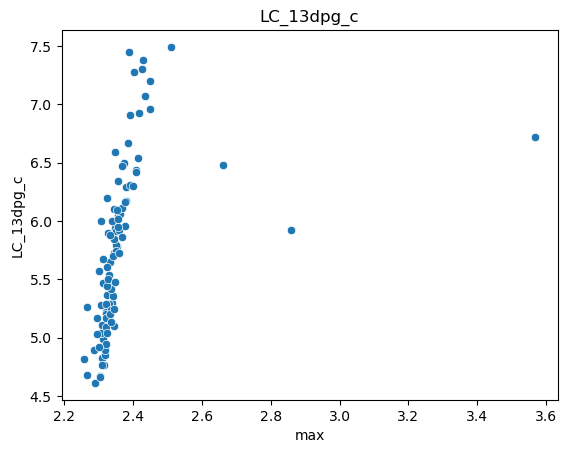

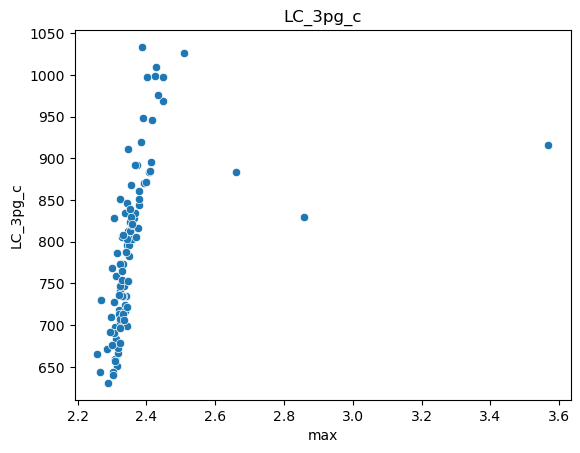

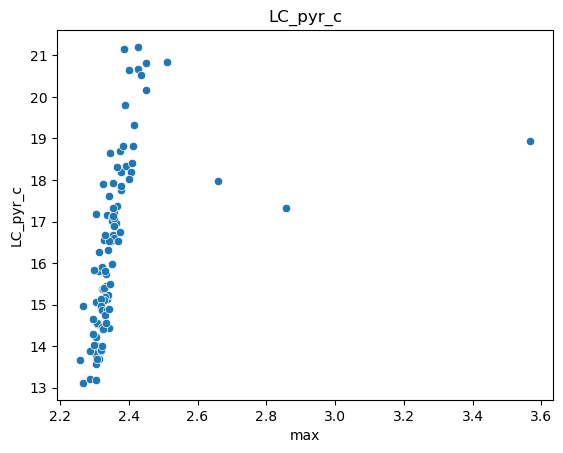

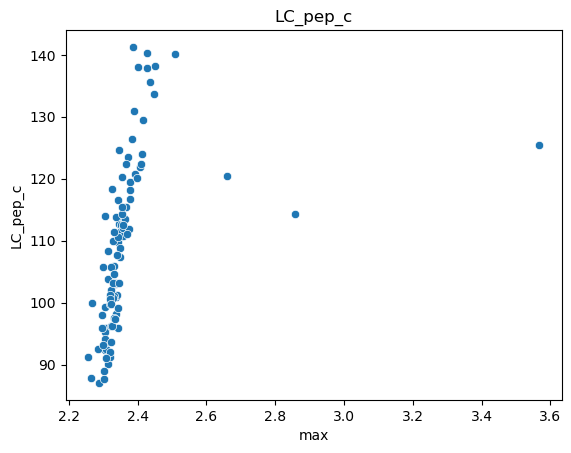

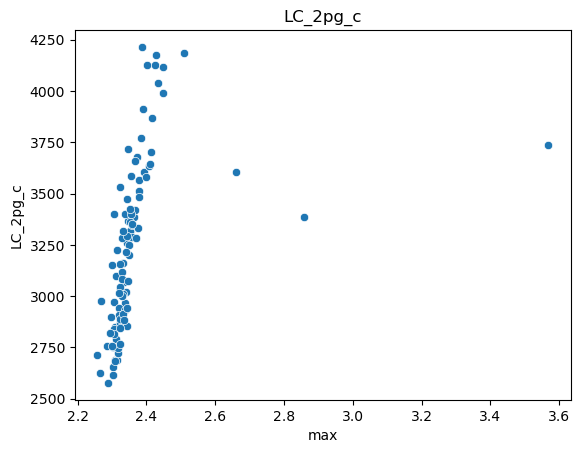

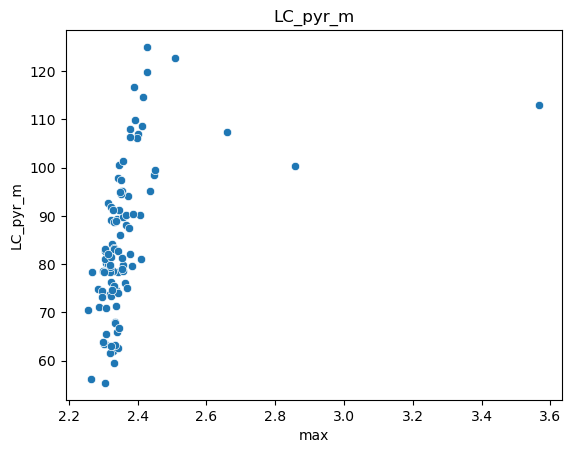

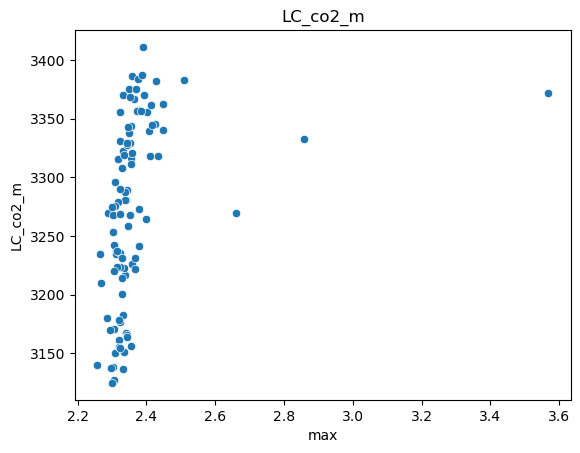

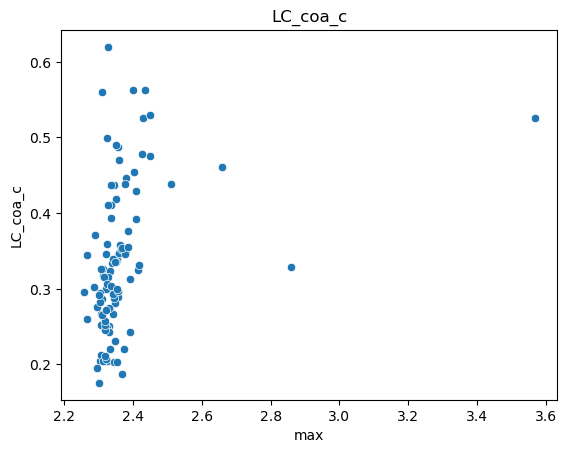

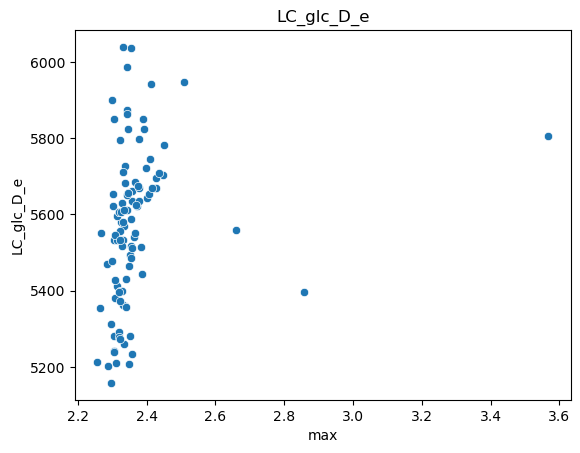

In [8]:
# Make a scatter plot of the max eigenvalue and the concentration variables that have the highest correlations 
# Top 10 

top_10 = correlations.head(10).index

for col in top_10:
    plt.figure()
    sns.scatterplot(x=eigenvalues['max'],y=tfa_samples[col])
    plt.title(col)

/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


<Axes: xlabel='max', ylabel='None'>

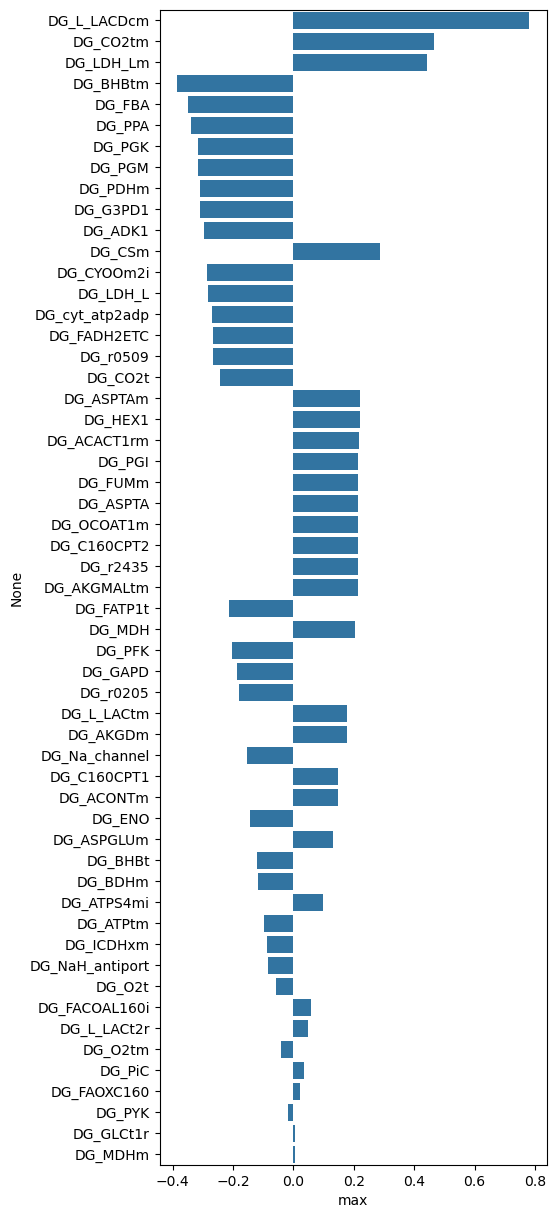

In [9]:
# Thermochemical correlations
thermodynamic_variables = [x for x in tfa_samples.columns if 'DG_' in x]

# Compute correlations between characteristics of the eigencalues and the concentration variables
correlations_thermo = pd.DataFrame()
for col in thermodynamic_variables:
    correlations_thermo[col] = eigenvalues[['max','mean','median']].corrwith(tfa_samples[col], method='spearman')

correlations_thermo = correlations_thermo.T
# Drop NA values
correlations_thermo = correlations_thermo.dropna()

# Make a colum if all correlations are consistent
correlations_thermo['consistent'] = correlations_thermo.apply(lambda x: all(x > 0) or all(x < 0),axis=1)

# Drop inconsistent correlations
correlations_thermo = correlations_thermo[correlations_thermo['consistent']]

# Sort by abs max
correlations_thermo['abs_max'] = correlations_thermo['max'].abs()

correlations_thermo = correlations_thermo.sort_values('abs_max',ascending=False)



# Plot the correlations as a bar plot
plt.figure(figsize=(5,15))
sns.barplot(data=correlations_thermo,x='max',y=correlations_thermo.index)

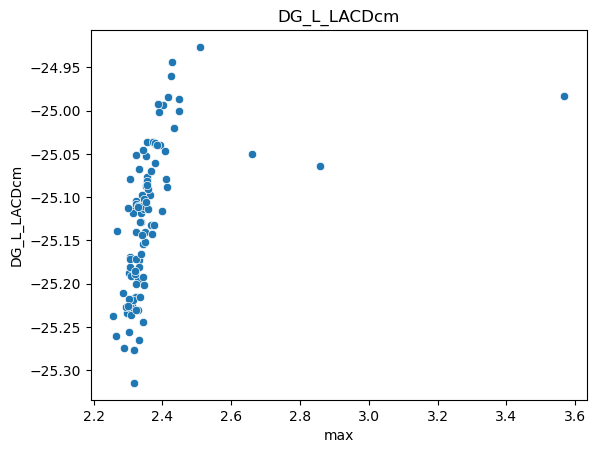

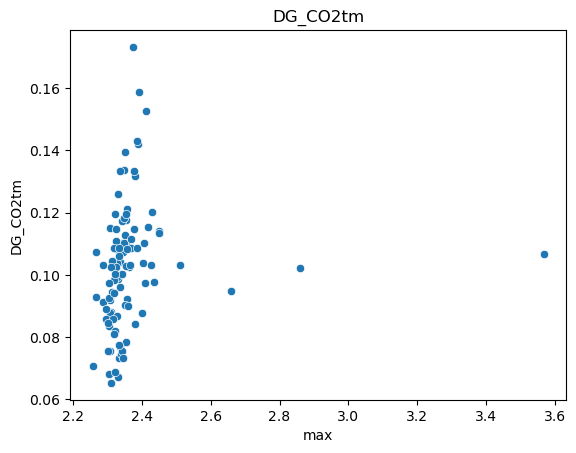

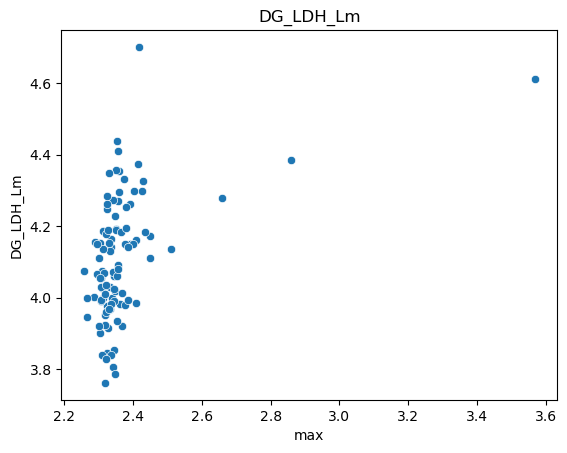

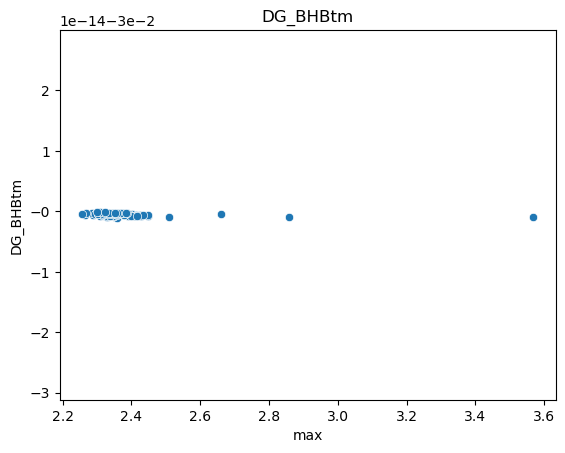

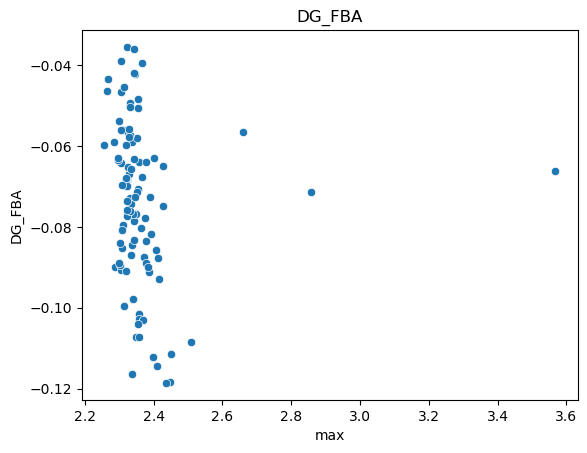

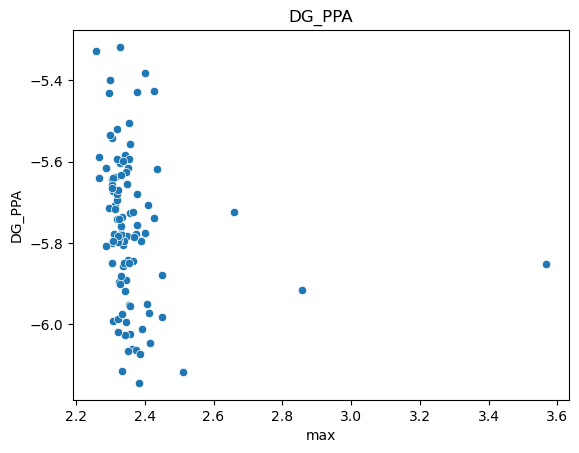

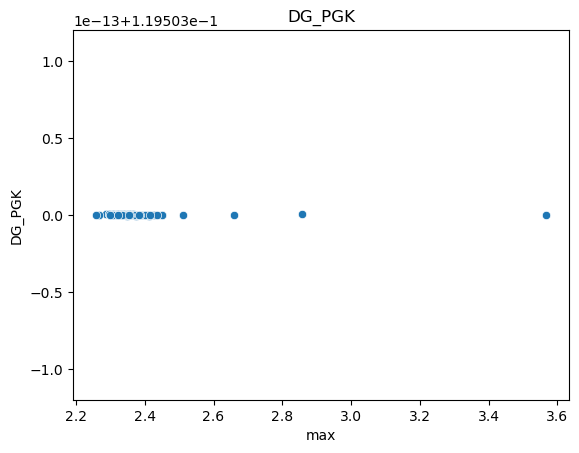

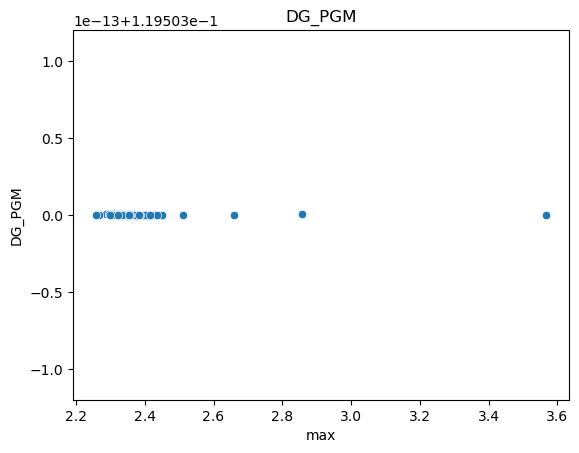

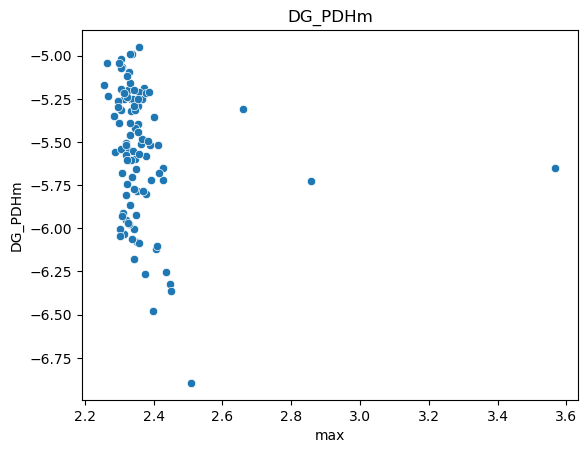

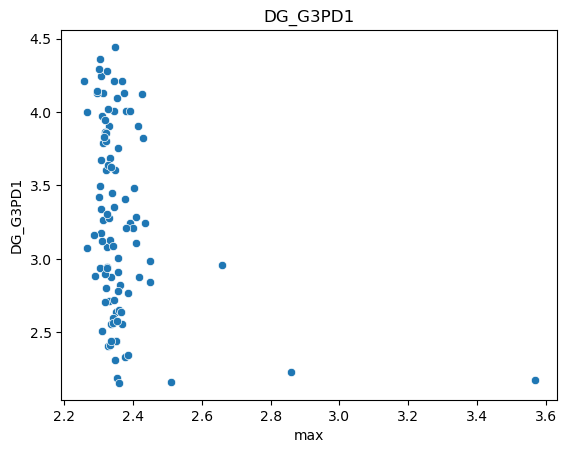

In [10]:
# Make a scatter plot of the max eigenvalue and the concentration variables that have the highest correlations
# Top 10

top_10_thermo = correlations_thermo.head(10).index

for col in top_10_thermo:
    plt.figure()
    sns.scatterplot(x=eigenvalues['max'],y=tfa_samples[col])
    plt.title(col)